In [17]:
import rebound
print(rebound.__build__)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Nov 17 2019 14:24:07


In [18]:
def setup():
    sim = rebound.Simulation()
    sim.add(m=1)
    sim.add(m=1e-3,a=1)
    sim.add(m=1e-3,a=1.2,f=1.23)
    return sim
def run(sim,times):
    E0 = sim.calculate_energy()
    Es = np.zeros(Nsamples)
    for i, t in enumerate(times):
        sim.integrate(t,exact_finish_time=0)
        E1 = sim.calculate_energy()
        Es[i] = np.abs((E0-E1)/E0)
    return Es

In [41]:
Nsamples = 1000
dt = setup().particles[1].P*0.045123123
times = np.linspace(0.,300.,Nsamples)

In [42]:
sim = setup()
sim.dt = dt
sim.integrator = "whfast"
sim.ri_whfast.coordinates = "democraticheliocentric"
E_wh = run(sim,times)

In [43]:
sim = setup()
sim.dt = dt
sim.integrator = "mercurius"
E_mercurius = run(sim,times)

In [48]:
sim = setup()
sim.dt = dt
sim.integrator = "mercurana"
sim.ri_ias15.min_dt = 1e-6
E_mercurana = run(sim,times)

In [49]:
sim = setup()
sim.dt = dt
sim.integrator = "leapfrog"
E_leapfrog = run(sim,times)

In [50]:
sim = setup()
sim.dt = dt
sim.integrator = "leapfrog"
sim.ri_whfast.kernel = "6aba363"
E_6aba363 = run(sim,times)

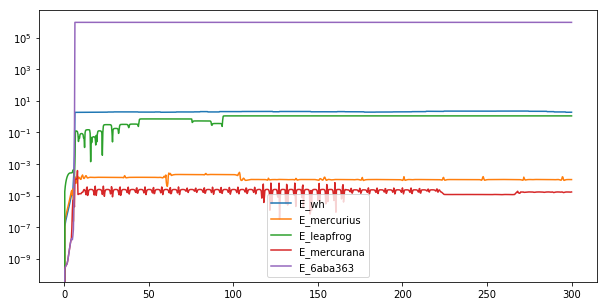

In [51]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_yscale("log")
ax.plot(times,E_wh,label="E_wh")
ax.plot(times,E_mercurius,label="E_mercurius")
ax.plot(times,E_leapfrog,label="E_leapfrog")
ax.plot(times,E_mercurana,label="E_mercurana")
ax.plot(times,E_6aba363,label="E_6aba363")
ax.legend();